# ✈️ San Francisco Airport Clustering

How do airports handle passenger flow? In this project, we will uncover patterns in the **San Francisco Airport dataset** using clustering techniques.

🔍 **What We'll Do:**
- Perform **Exploratory Data Analysis (EDA)** for insights  
- Create **visualizations**  
- Apply **K-Means Clustering** for segmentation  
- Evaluate clusters using the **Silhouette Score**  

📊 **Dataset:** [Airlines Traffic & Passenger Statistics](https://www.kaggle.com/datasets/thedevastator/airlines-traffic-passenger-statistics)  

---

<div style="text-align: center;">
    <img src="https://lavishride.com/storage/1292/SFO-San-Francisco-International-Airport.webp" alt="Image">
</div>

### Importing the necessary packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

### Importing the data

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

### EDA - Exploratory Data Analysis 

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


In [5]:
df.nunique()

Activity Period                  156
Operating Airline                 89
Operating Airline IATA Code       82
Published Airline                 79
Published Airline IATA Code       73
GEO Summary                        2
GEO Region                         9
Activity Type Code                 3
Price Category Code                2
Terminal                           5
Boarding Area                      8
Passenger Count                13970
dtype: int64

In [6]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [8]:
df.sample(8)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
1041,200604,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Other,International,A,31200
5381,200905,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,Terminal 1,B,5603
12654,201408,Korean Air Lines,KE,Korean Air Lines,KE,International,Asia,Deplaned,Other,International,A,8302
10379,201212,Emirates,EK,Emirates,EK,International,Middle East,Deplaned,Other,International,A,9968
13963,201507,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Enplaned,Other,International,A,10937
2224,200702,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,4294
11475,201310,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,20605
2445,200704,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Deplaned,Low Fare,Terminal 1,C,25255


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


### Feature Engineering

In [11]:
#replacing the values 'United Airlines - Pre 07/01/2013' with 'United Airlines' in the 'Operating Airline' and 'Published Airline'
df['Operating Airline'] = df['Operating Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines')
df['Published Airline'] = df['Published Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines')

In [12]:
#extracting the month and year from the 'Activity Period' column in DataFrame
#creating new columns "Activity Month" and 'Activity Year'
df["Activity Month"] = df["Activity Period"].astype(str).str[4:].astype(int)
df["Activity Year"] = df["Activity Period"].astype(str).str[:4:].astype(int)
df.drop(columns=["Activity Period"], inplace=True)

In [14]:
#retaining only the rows where the 'Published Airline IATA Code' column is not null
df = df[pd.notnull(df["Published Airline IATA Code"])]

In [15]:
df.isnull().sum()

Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Activity Month                 0
Activity Year                  0
dtype: int64

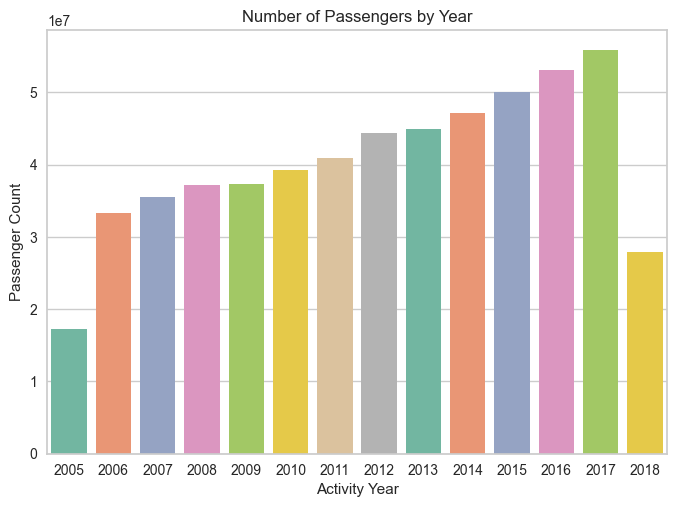

In [16]:
#number of passengers by year
passenger_counts = df.groupby('Activity Year')['Passenger Count'].sum().reset_index()
sns.barplot(data=passenger_counts, x='Activity Year', y='Passenger Count',palette='Set2')
plt.title('Number of Passengers by Year')
plt.show()

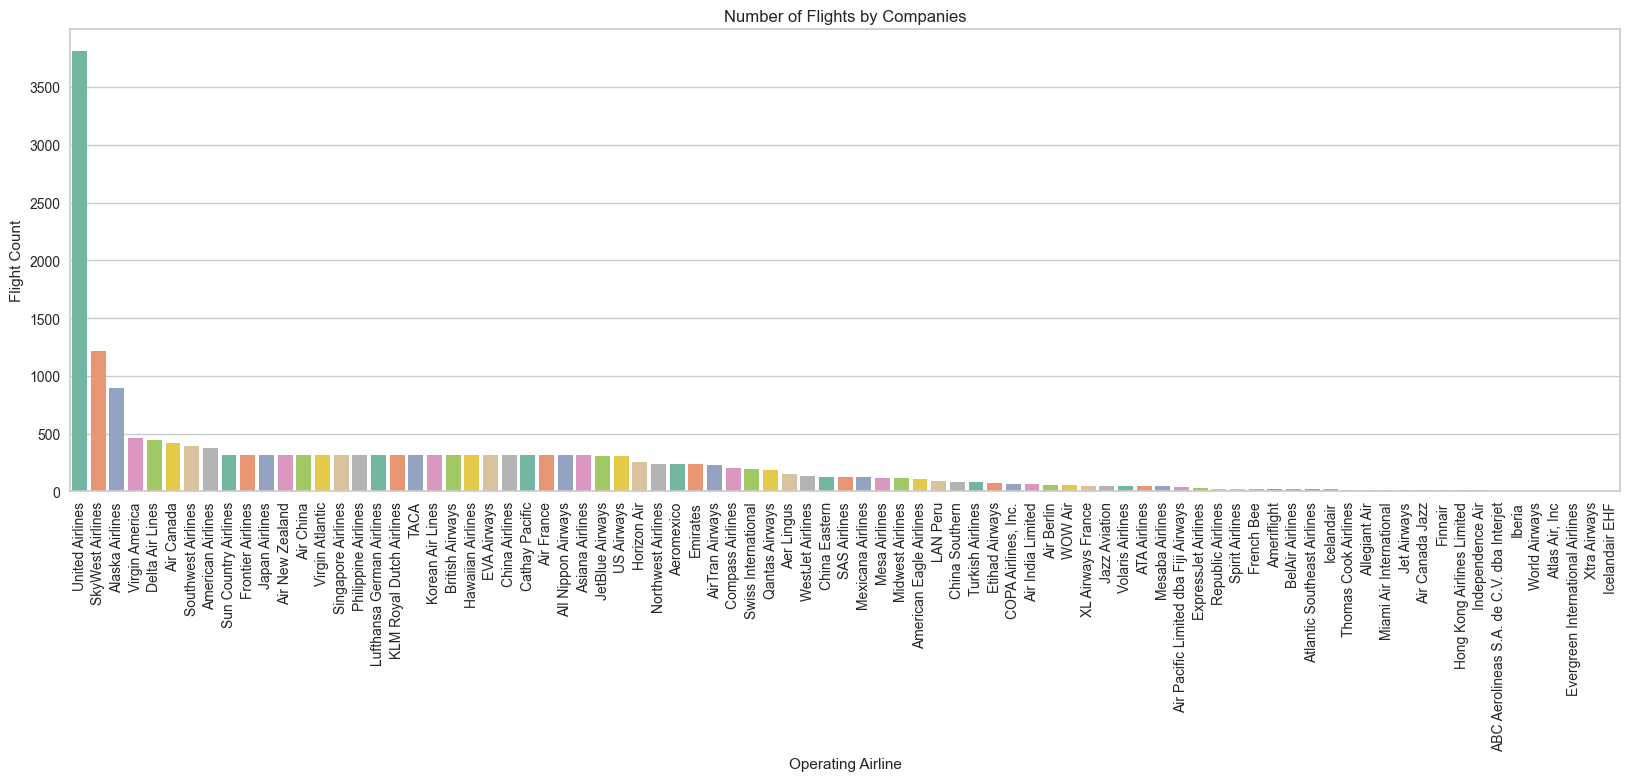

In [17]:
#number of flights by companies
flight_counts = df['Operating Airline'].value_counts().reset_index()
flight_counts.columns = ['Operating Airline', 'Flight Count']
plt.figure(figsize=(20, 6))
sns.barplot(x='Operating Airline', y='Flight Count', data=flight_counts, palette='Set2')
plt.title('Number of Flights by Companies')
plt.xlabel('Operating Airline')
plt.ylabel('Flight Count')
plt.xticks(rotation=90)
plt.show();

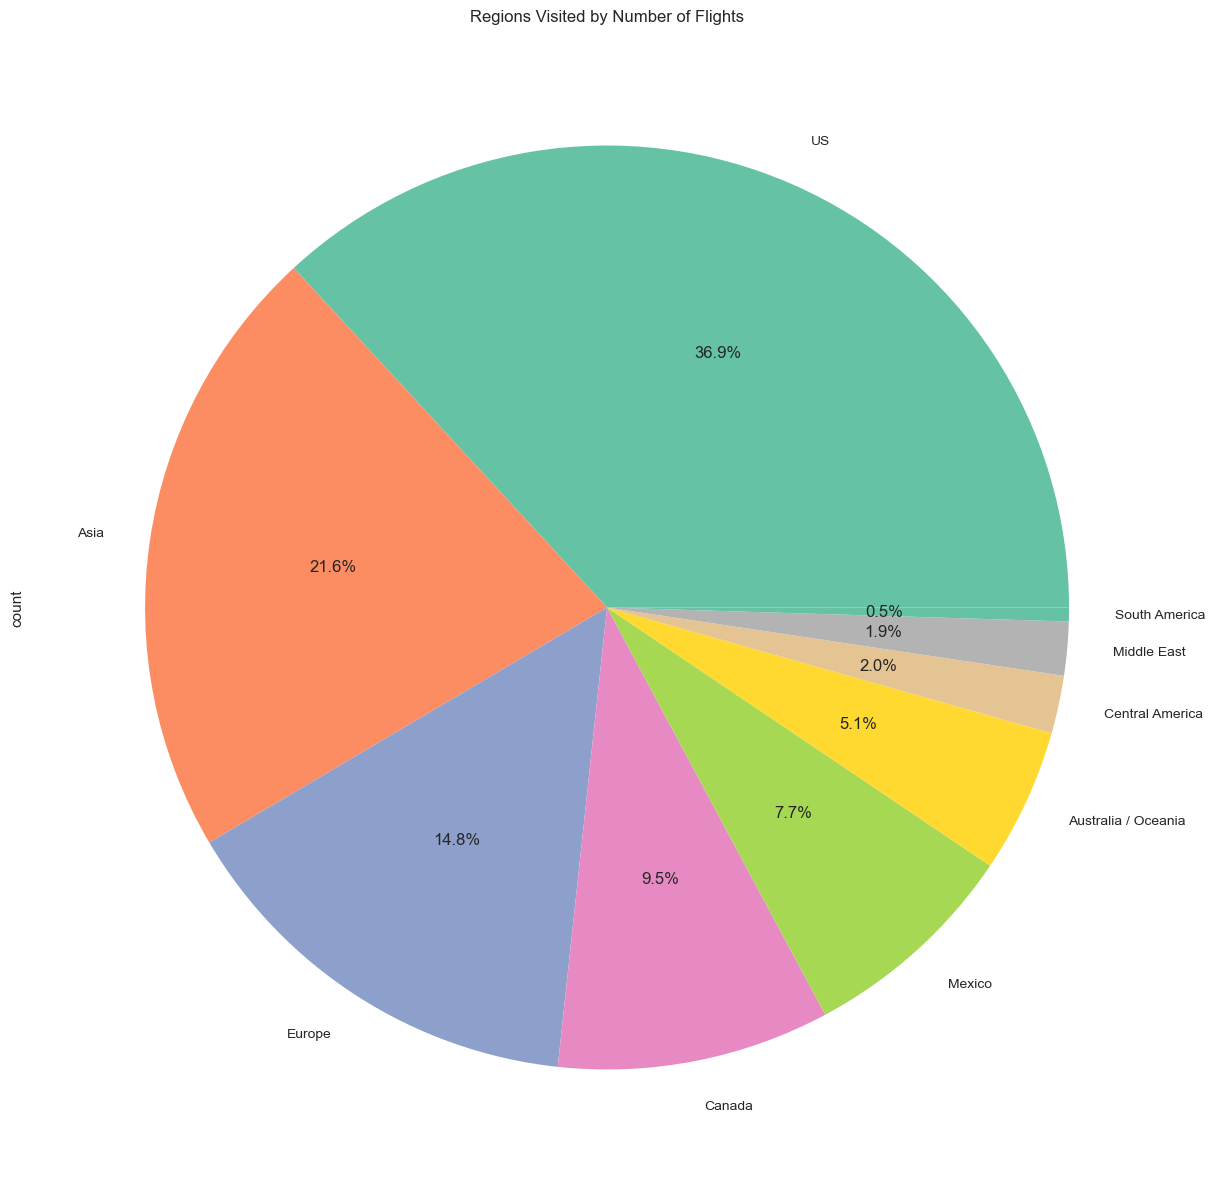

In [16]:
flight_counts = df['GEO Region'].value_counts()
plt.figure(figsize=(15, 15))
flight_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Regions Visited by Number of Flights')
plt.show()

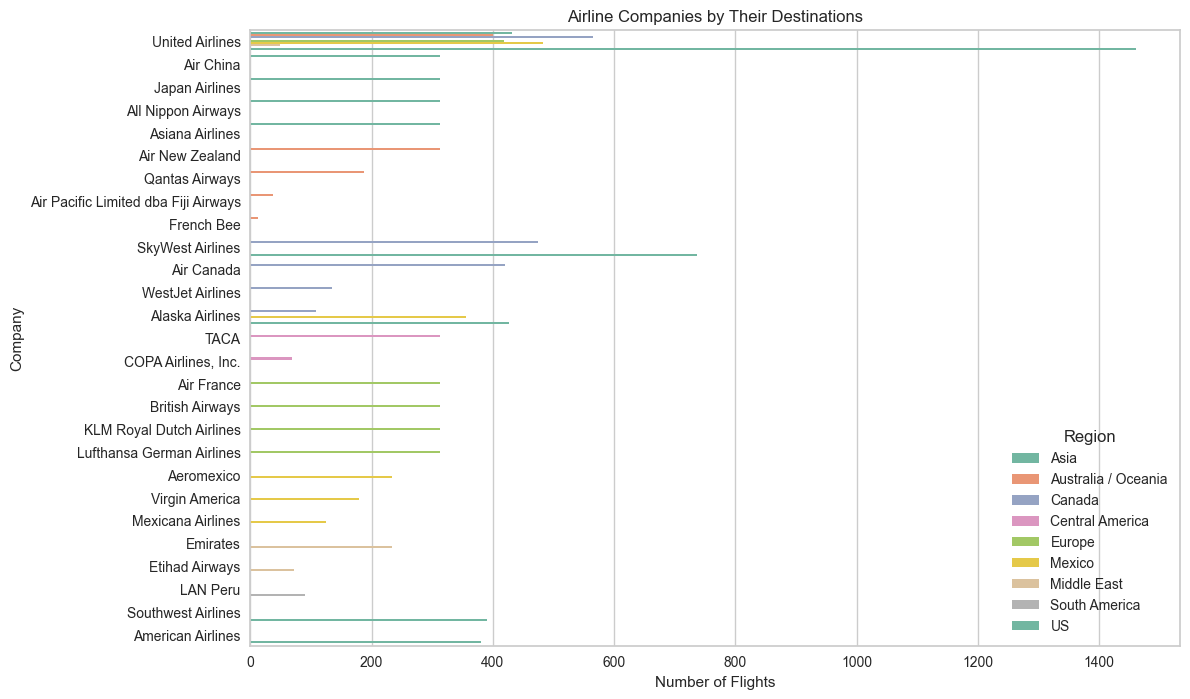

In [18]:
#airline companies by their destinations
geo_airline_counts = df.groupby(['GEO Region', 'Operating Airline']).size().reset_index(name='Counts')
top_geo_airlines = geo_airline_counts.groupby('GEO Region').apply(lambda x: x.nlargest(5, 'Counts')).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_geo_airlines, x='Counts', y='Operating Airline', hue='GEO Region', palette='Set2')
plt.title('Airline Companies by Their Destinations')
plt.xlabel('Number of Flights')
plt.ylabel('Company')
plt.legend(title='Region')
plt.show()

### Segmentation by using KMeans and calculating the Silhouette Score

In [20]:
x=pd.get_dummies(df,drop_first=True)

In [21]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i)
        K.fit(x)
        predict_kmeans=K.predict(x)
        score=silhouette_score(x,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}")   

In [22]:
cluster(10)

cluster=2, score=0.8593932400658328
cluster=3, score=0.8283824872077927
cluster=4, score=0.8198159615540835
cluster=5, score=0.7844844307250174
cluster=6, score=0.7844336230297433
cluster=7, score=0.6621056664320867
cluster=8, score=0.6456156396441961
cluster=9, score=0.6408266983254176


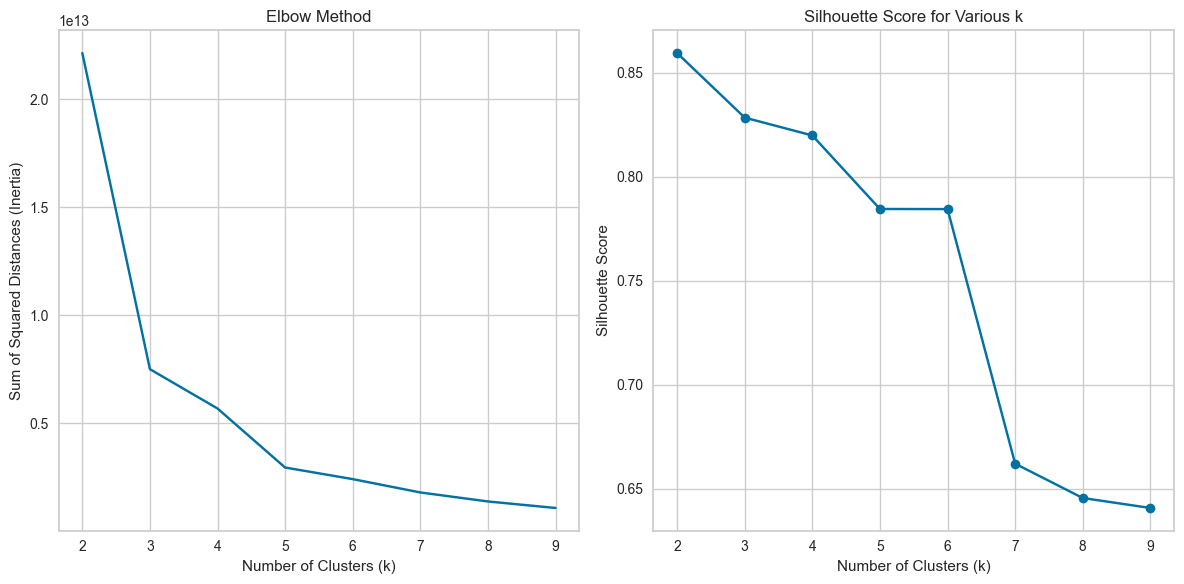

In [23]:
#elbow method plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(2, 10), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method')

#silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(all_clusters, all_score, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various k')
plt.tight_layout()
plt.show()

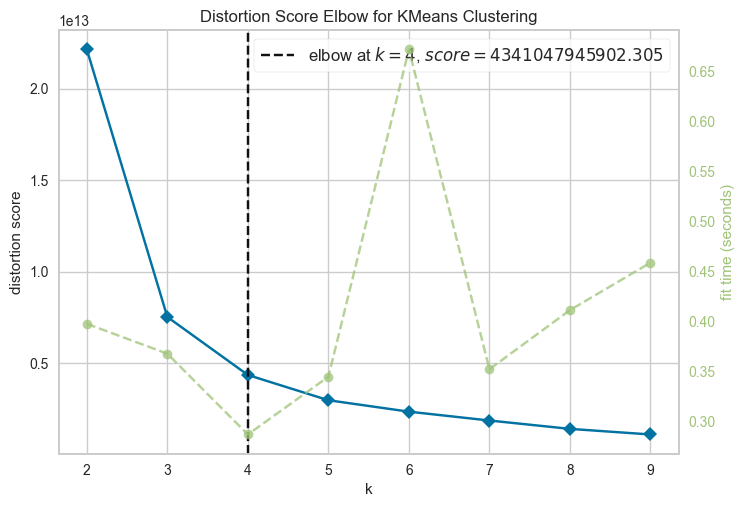

In [24]:
#displaying the elbow curve to visualize the results
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

## ✈️ Results and Evaluation

After applying **K-Means clustering**, we evaluated different cluster sizes using the **Silhouette Score** to determine the optimal segmentation.

### 🔍 Key Findings:
- **2 clusters** achieved the highest score (**0.86**), suggesting a clear division in passenger behavior.
- Increasing the number of clusters slightly reduced cohesion, with **scores gradually dropping from 0.83 to 0.64**.
- Beyond **6 clusters**, segmentation became less meaningful, indicating diminishing returns in granularity.

### 📊 Evaluation:
- **High Silhouette Score** values indicate well-separated clusters.
- **Lower scores** (clusters 7-9) suggest overlap and weaker distinctiveness.
- Optimal clusters depend on **business goals**—fewer clusters provide broader insights, while more clusters offer micro-segmentation.

### 🌍 Real-World Applications:
✅ **Passenger Flow Optimization** – Airports can group passengers based on travel patterns to improve terminal design.  
✅ **Targeted Services** – Airlines can personalize offerings, such as lounge access or premium upgrades, based on passenger clusters.  
✅ **Revenue Strategies** – Retail spaces in airports can optimize store placements based on segmented traveler behavior.  